# Profitable App Profiles for the App Store and Google Play Markets
The aim of this project is to find mobile app profiles that are profitable for the App Store and Google Play markets. This will help developers to make data-driven decisions with respect to the kind of apps they build.

The apps considered here are free to download and install, and the main source of revenue consists of in-app ads. This means that revenue for any given app is mostly influenced by the number of users that use the app. The goal of this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users.


As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

These are two data sets (available at Kaggle.com) that are being used here for the analysis:

1. A [data set](https://www.kaggle.com/lava18/google-play-store-apps/home) containing data about approximately ten thousand Android apps from Google Play

2. A [data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home) containing data about approximately seven thousand iOS apps from the App Store
Let's start by opening the two data sets and then continue with exploring the data.



#### Import all external libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.8)

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import random

import scipy.stats as stats

# Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Step 1: Exploring Data

In [2]:
ios = pd.read_csv('AppleStore.csv')
android = pd.read_csv('googleplaystore.csv')

### Google PlayStore Apps

In [3]:
print(android.shape)
android.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Google Play data set has 10841 apps and 13 columns. At a quick glance, the columns that might be useful for the purpose of our analysis are 'App', 'Category', 'Reviews', 'Installs', 'Type', 'Price', and 'Genres'.

All the columns are:

1. Apps: Application name
1. Category: Category the app belongs to
1. Rating: Overall user rating of the app (as when scraped)
1. Reviews: Number of user reviews for the app (as when scraped)
1. Size: Size of the app (as when scraped)
1. Installs: Number of user downloads/installs for the app (as when scraped)
1. Type: Paid or Free
1. Price: Price of the app (as when scraped)
1. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
1. Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
1. Last Updated: Date when the app was last updated on Play Store (as when scraped)
1. Current Ver: Current version of the app available on Play Store (as when scraped)
1. Android Ver: Min required Android version (as when scraped)


### App Store

In [4]:
print(ios.shape)
ios.head()

(7197, 17)


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


There are 7197 iOS apps in this data set, and the columns that seem interesting are: 'track_name', 'price', 'rating_count_tot', 'rating_count_ver', and 'prime_genre'. Details about each column can be found in the data set [documentation](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home).

1. "id" : App ID

1. "track_name": App Name

1. "size_bytes": Size (in Bytes)

1. "currency": Currency Type

1. "price": Price amount

1. "rating_count_tot": User Rating counts (for all version)

1. "rating_count_ver": User Rating counts (for current version)

1. "user_rating" : Average User Rating value (for all version)

1. "user_rating_ver": Average User Rating value (for current version)

1. "ver" : Latest version code

1. "cont_rating": Content Rating

1. "prime_genre": Primary Genre

1. "sup_devices.num": Number of supporting devices

1. "ipadSc_urls.num": Number of screenshots showed for display

1. "lang.num": Number of supported languages

1. "vpp_lic": Vpp Device Based Licensing Enabled

## Step 2: Data Wrangling

##### Check for inaccurate entries
All the user ratings are between 0 to 5. So I check if any entries have ratings outside of this limit. 

All the numeric values are stored as strings in the android app dataset. So I have changed them to numbers.

In [5]:
ios_incorrect = ios[(ios['user_rating'] > 5) | (ios['user_rating'] < 0)]
ios_incorrect

cols = android.columns
android[cols] = android[cols].apply(pd.to_numeric, errors='ignore')
android.head()

android_incorrect = android[(android['Rating']> 5) | (android['Rating'] < 0)]
android_incorrect



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


 Print the incorrect row and compare it against the header and another row that is correct.

In [6]:
#Checking incorrect data
android.iloc[[1, 10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Since the category of app in row 10472 is missing all the other columns values are shifted left and give incorrect information. For example rating is 19, which is clearly off because the maximum rating for a Google Play app is 5. This row is therefore deleted.

In [7]:
# Delete incorrect row
android.drop(10472, inplace=True)
len(android)

10840

### Recognize Duplicate entries

In [8]:
android[android['App']=='Box']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device


In [9]:
android[android['App']=='Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


#### Count number of unique and duplicate apps

In [10]:
duplicate = len(android['App'])-len(android['App'].drop_duplicates())
print('Number of duplicate apps =', duplicate)

Number of duplicate apps = 1181


In [11]:
unique = android.App.nunique()
print('Number of unique apps =', unique) 

Number of unique apps = 9659


The duplicate apps should be counted only once while analyzing data but it is better to have a consistent criteria in removing the duplicate entries rather than doing it randomly.

For example in the Instagram app, the only difference is in the number of reviews (fourth element of row). This may be used as a criterion for keeping rows. I'll keep the rows that have the highest number of reviews because the higher the number of reviews, the more reliable the ratings.

If there are more than one rows with the same reviews, I will drop the duplicates.

In [12]:
android_unique=android.sort_values('Reviews', ascending=False).groupby('App', as_index=False).first()
android_unique=android_unique.sort_values(['Category', 'App']).reset_index(drop=True)
print(len(android_unique))
android_unique.head()

9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,350 Diy Room Decor Ideas,ART_AND_DESIGN,4.5,27,17M,"10,000+",Free,0,Everyone,Art & Design,"November 7, 2017",1.0,2.3 and up
1,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,1518,37M,"100,000+",Free,0,Everyone,Art & Design,"August 3, 2018",1.2.3,2.3 and up
2,AJ Styles HD Wallpapers,ART_AND_DESIGN,4.8,48,25M,"5,000+",Free,0,Everyone,Art & Design,"August 4, 2018",1.1.1,4.1 and up
3,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,ART_AND_DESIGN,4.0,18,3.6M,"1,000+",Free,0,Everyone,Art & Design,"March 22, 2018",1.1,4.0 and up
4,Ai illustrator viewer,ART_AND_DESIGN,3.4,486,5.9M,"100,000+",Free,0,Everyone,Art & Design,"July 26, 2018",5.7,5.0 and up


Sort function sorts the dataframe according to reviews. first() selects the first row in case of multiple row with same reviews

## Step 3: Removing non english apps

The numbers corresponding to the characters we commonly use in an English text are all in the range 0 to 127, according to the ASCII (American Standard Code for Information Interchange) system. Based on this number range, we can build a function that detects whether a character belongs to the set of common English characters or not. If the number is equal to or less than 127, then the character belongs to the set of common English characters, otherwise it doesn't. So if an app name contains a character that is greater than 127, then it probably means that the app has a non-English name. Our app names, however, are stored as strings, so how could we take each individual character of a string and check its corresponding number?

In [13]:
# Define function that takes in a string and returns False if there's any character in the string that doesn't belong to the set of common English characters, otherwise it returns True
def check_eng(string1):
    for letter in string1:
        if ord(letter)>127:
            return False
    return True

#Examples
print(check_eng('Instagram'))
print(check_eng('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(check_eng('Docs To Go™ Free Office Suite'))
print(check_eng('Instachat 😜'))

True
False
False
False


In the example above function couldn't identify correctly certain English app names like 'Docs To Go™ Free Office Suite' and 'Instachat 😜'. This is because emojis and some characters like ™ fall outside the ASCII range and have corresponding numbers that are over 127. Therefore we redefine the function so that it only remove an app if its name has more than three characters with corresponding numbers falling outside the ASCII range.

In [14]:
# This minimizes the loss of data
def check_english(string1):
    count = 0
    for letter in string1:
        if ord(letter)>127:
            count += 1
    if count > 3:
        return False
    else:
        return True
        
#Examples
print(check_english('Instagram'))
print(check_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(check_english('Docs To Go™ Free Office Suite'))
print(check_english('Instachat 😜')) 

True
False
True
True


### Remove non-english apps from the two datasets

#### Android apps

In [15]:
App_android=android_unique['App']
non_eng =[x for x in App_android if check_english(x)]
android_eng = android_unique[android_unique['App'].isin(non_eng)]
print(android_eng.shape)
android_eng.head()

(9614, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,350 Diy Room Decor Ideas,ART_AND_DESIGN,4.5,27,17M,"10,000+",Free,0,Everyone,Art & Design,"November 7, 2017",1.0,2.3 and up
1,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,1518,37M,"100,000+",Free,0,Everyone,Art & Design,"August 3, 2018",1.2.3,2.3 and up
2,AJ Styles HD Wallpapers,ART_AND_DESIGN,4.8,48,25M,"5,000+",Free,0,Everyone,Art & Design,"August 4, 2018",1.1.1,4.1 and up
3,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,ART_AND_DESIGN,4.0,18,3.6M,"1,000+",Free,0,Everyone,Art & Design,"March 22, 2018",1.1,4.0 and up
4,Ai illustrator viewer,ART_AND_DESIGN,3.4,486,5.9M,"100,000+",Free,0,Everyone,Art & Design,"July 26, 2018",5.7,5.0 and up


#### IOS apps

In [16]:
App_ios=ios['track_name']
non_eng =[x for x in App_ios if check_english(x)]
ios_eng = ios[ios['track_name'].isin(non_eng)]
print(ios_eng.shape)
ios_eng.head()

(6183, 17)


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


## Step 4: Isolating free apps
The data sets contain both free and non-free apps, and  only the free apps are to be considered for the analysis. The relevant column names are 'Price' and 'price' in Google app and Apple app data.

In [17]:
android_free = android_eng[android_eng['Price'] == '0']
print('Number of free android apps = ' , len(android_free))

ios_free = ios_eng[ios_eng['price'] == 0.0]
print('Number of free ios apps = ' , len(ios_free))

Number of free android apps =  8862
Number of free ios apps =  3222


In [18]:
android_free = android_free.copy()
android_free['Installs'] = android_free['Installs'].str.replace(',', '').str.replace('+', '').astype(float)

cols = android_free.columns
android_free[cols] = android_free[cols].apply(pd.to_numeric, errors='ignore')
android_free.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,350 Diy Room Decor Ideas,ART_AND_DESIGN,4.5,27,17M,10000.0,Free,0,Everyone,Art & Design,"November 7, 2017",1.0,2.3 and up
1,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,1518,37M,100000.0,Free,0,Everyone,Art & Design,"August 3, 2018",1.2.3,2.3 and up
2,AJ Styles HD Wallpapers,ART_AND_DESIGN,4.8,48,25M,5000.0,Free,0,Everyone,Art & Design,"August 4, 2018",1.1.1,4.1 and up
3,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,ART_AND_DESIGN,4.0,18,3.6M,1000.0,Free,0,Everyone,Art & Design,"March 22, 2018",1.1,4.0 and up
4,Ai illustrator viewer,ART_AND_DESIGN,3.4,486,5.9M,100000.0,Free,0,Everyone,Art & Design,"July 26, 2018",5.7,5.0 and up


Look for any evident patterns between the columns. 

#### Correlation matrix of a dataframe

In [19]:
def corr(df):
    corr = df.corr()
    plt.subplots(figsize=(10,8))
    corr_mat = sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', annot=True)               
    corr_mat.set_xticklabels(labels=corr.columns.values, rotation=90)
    corr_mat.set_yticklabels(labels=corr.columns.values, rotation=0)
    plt.show()
  

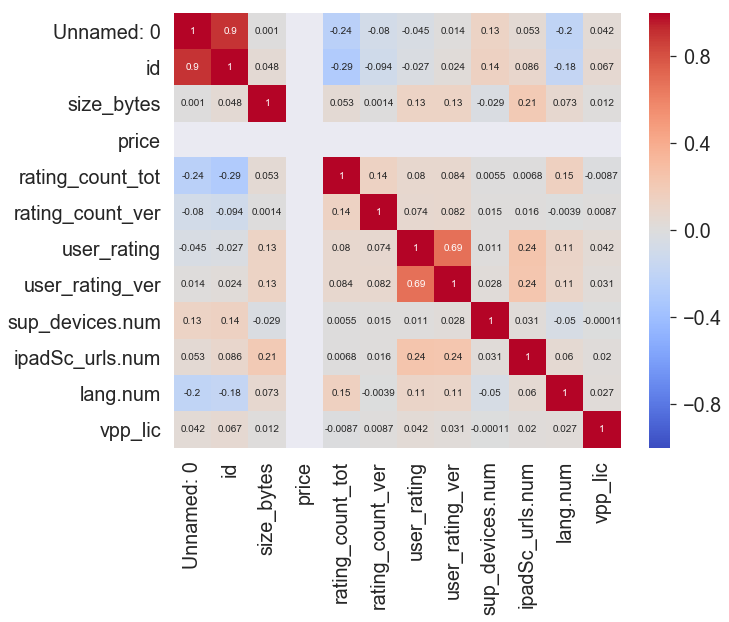

In [20]:
corr(ios_free)

User ratings and User rating ver are strongly correlated. The correlation between rating count tot and user rating is not that strong. 

In [21]:
# ios_A = ios_free[['track_name','rating_count_tot', 'rating_count_ver', 
#                      'user_rating', 'user_rating_ver', 'cont_rating', 'prime_genre']]
# sns.pairplot(ios_A, hue= 'prime_genre')

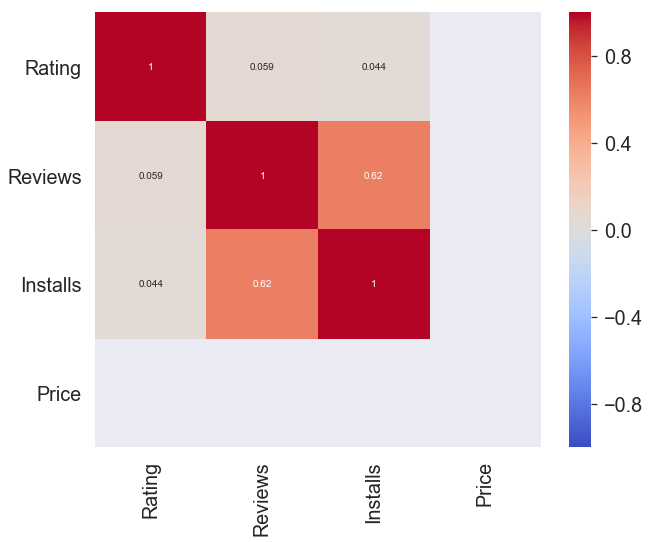

In [22]:
corr(android_free)

Reviews and installs seem to be correlated.

# Step 5: Find Most Common Apps by Genre


To minimize risks and overhead, the validation strategy for an app idea is comprised of three steps:

- Build a minimal Android version of the app, and add it to Google Play.
- If the app has a good response from users, we then develop it further.
- If the app is profitable after six months, we also build an iOS version of the app and add it to the App Store.

Our end goal is to add the app on both the App Store and Google Play, we need to find app profiles that are successful on both markets. 

In [23]:
# # calculate the spearmans's correlation between two variables
# from scipy.stats import spearmanr
# def spearman_corr(data1, data2):
#     corre,_ = spearmanr(data1, data2)
#     print('Spearmans correlation: %.3f' % corre)
    
# data1 = ios_free [['rating_count_tot']]
# data2 = ios_free [['user_rating']]
# spearman_corr(data1, data2)

We begin the analysis by getting a sense of the most common genres for each market. For this, we'll build a frequency table for the prime_genre column of the App Store data set, and the Genres and Category columns of the Google Play data set.

### 5.1 Examine number of apps per category in both dataframes
The function below calculates the frequency table of a column for a given df.

In [24]:
def random_color_generator(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

def commongenre(df,genre):
    groupdf=df[genre].value_counts().sort_values(ascending=False)
        
    pie_data = [go.Pie(
        labels = groupdf.index,
        values = groupdf.values,
        hoverinfo = 'label+value')]
    
    plt1 = py.iplot(pie_data)
    
    text = ['{:.2f}%'.format(100 * (value / groupdf.sum())) for value in groupdf.values]
        
    trace = go.Bar(
    x = groupdf.index,
    y = groupdf.values,
    text = text,
    marker = dict(color = random_color_generator(100),
                  line = dict(color='rgb(8, 48, 107)', width = 1.5)),opacity = 0.7)
    
    
    bar_data = [trace]

    layout = go.Layout(title = genre,
                       margin = dict(l = 100),xaxis = dict(title = genre),
                       yaxis = dict( title = 'Count'), width = 1000, height = 500)


    fig = go.Figure(bar_data, layout=layout)
    plt2 = py.iplot(fig)
    
    return plt1, plt2
    

In [25]:
commongenre(ios_free,'prime_genre')
plt.show()

We can see that among the free English apps, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

In [26]:
commongenre(android_free,'Category')

(None, None)

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.

Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the Genres column:

In [27]:
group_android2, plt3 = commongenre(android_free,'Genres')

The difference between the Genres and the Category columns is not crystal clear, but one thing we can notice is that the Genres column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the Category column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

### 5.2 Find Most Popular Apps by Genre on the App Store
One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data, this information in the Installs column, but this information is missing for the App Store data set. As a workaround, we'll take the total number of user ratings as a proxy.


In [28]:
def hip_apps(dataset,index,genre,criteria):
    apps = dataset.groupby([genre]).agg({index:'count',
                                criteria:'sum'}).reset_index()
    apps['Apps_Percent'] = apps[index]*100/apps[index].sum()
    apps['Ratings per app'] = apps[criteria]/apps[index]
    apps.columns=['Genre', 'Number of apps', 'Total ratings', 'Apps_Percent', 'Ratings per app']
    apps = apps.sort_values(by=['Ratings per app'], ascending=False).reset_index(drop=True)
    
     
    
    trace = go.Bar(
    x = apps['Genre'],
    y = apps['Ratings per app'],
    marker = dict(color = random_color_generator(100),
                  line = dict(color='rgb(8, 48, 107)', width = 1.5)),opacity = 0.7)
    
    
    bar_data = [trace]

    layout = go.Layout(title = 'Number of Ratings or Installs per app',
                       margin = dict(l = 100),xaxis = dict(title = genre),
                       yaxis = dict(title = 'Count'), width = 1000, height = 500)


    fig = go.Figure(bar_data, layout=layout)
    py.iplot(fig)
   
    return apps, plt   
   

We start by calculating the average number of user ratings per app genre on the App Store. To do that, we'll need to:

- Isolate the apps of each genre
- Sum up the user rating counts for the apps of that genre
- Divide the sum by the number of apps belonging to that genre (not by the total number of apps)

The above function does that

In [29]:
ios_apps, plt = hip_apps(ios_free, 'id', 'prime_genre','rating_count_tot')
ios_apps

,Genre,Number of apps,Total ratings,Apps_Percent,Ratings per app
0,Navigation,6,516542,0.186220,86090.333333
1,Reference,18,1348958,0.558659,74942.111111
2,Social Networking,106,7584125,3.289882,71548.349057
3,Music,66,3783551,2.048417,57326.530303
4,Weather,28,1463837,0.869025,52279.892857
5,Book,14,556619,0.434513,39758.500000
6,Food & Drink,26,866682,0.806952,33333.923077
7,Finance,36,1132846,1.117318,31467.944444
8,Photo & Video,160,4550647,4.965860,28441.543750
9,Travel,40,1129752,1.241465,28243.800000


Navigation apps have highest number of user reviews followed by reference and social networking. 

Let's check if there is any correlation between number of apps and their average ratings

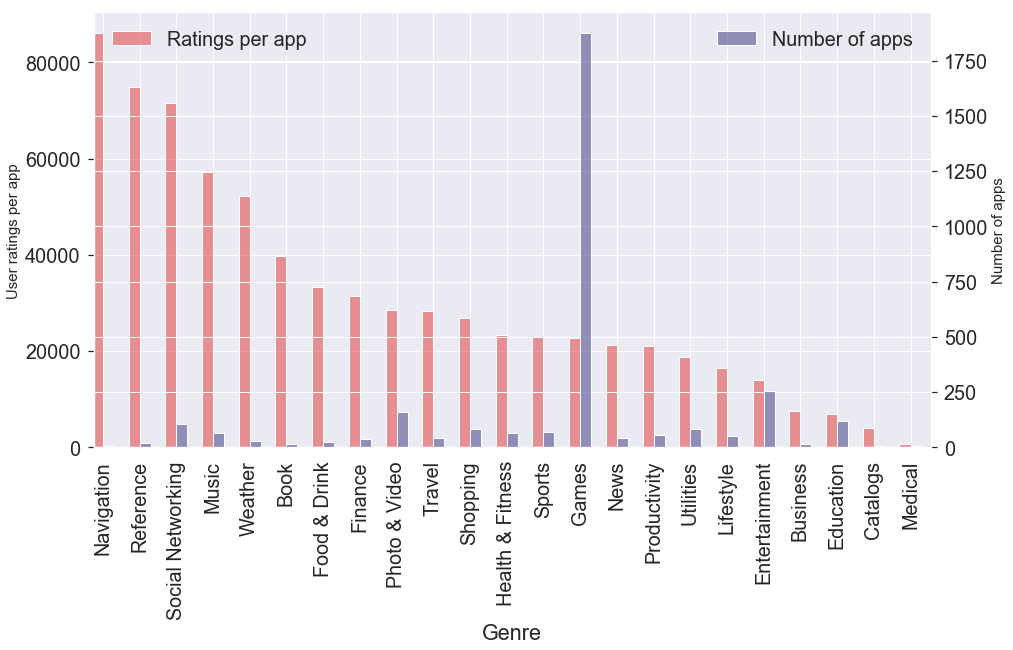

In [30]:
#ios_apps = ios_apps.sort_values(by=['percentage'], ascending=False).reset_index(drop=True)
fig, ax = plt.subplots()
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

ios_apps.plot(x = 'Genre', y='Ratings per app', ax=ax, kind='bar',  width=0.3, 
              color=(0.9, 0.2, 0.2, 0.5), position=1, figsize=(15,8), 
              label = 'Ratings per app', legend = True) 

ios_apps.plot(x = 'Genre', y='Number of apps', ax=ax2, kind='bar',  width=0.3, 
              color=(0.2, 0.2, 0.5, 0.5), position=0, figsize=(15,8), 
              label = 'Number of apps', legend = True)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

ax.set_ylabel('User ratings per app', fontsize='15')
ax2.set_ylabel('Number of apps', fontsize='15')

plt.show() 

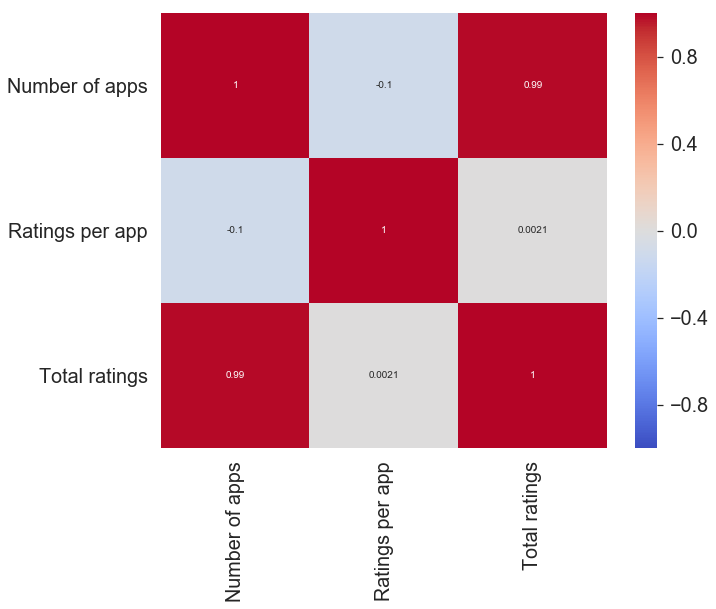

In [31]:
corr(ios_apps[['Number of apps', 'Ratings per app', 'Total ratings']])

 There is no correlation between total ratings and user ratings per app.

In [32]:
top_apps = list(ios_apps.Genre[0:10])
df = ios_free [ios_free.prime_genre.isin(top_apps)]

Compare user ratings and rating count tot across categories to find if there is statistically significant difference.

### Check the user rating of top apps 

## Kruskal-Wallis H-test for user ratings in top genres/categories

In [33]:
test_by = 'user_rating'

f1 = stats.kruskal(df.loc[df.prime_genre == 'Navigation'][test_by].dropna(), 
               df.loc[df.prime_genre == 'Reference'][test_by].dropna(),
               df.loc[df.prime_genre == 'Social Networking'][test_by].dropna(),
             df.loc[df.prime_genre == 'Music'][test_by].dropna(), 
                   df.loc[df.prime_genre == 'Weather'][test_by].dropna(),
               df.loc[df.prime_genre == 'Book'][test_by].dropna(),
               df.loc[df.prime_genre == 'Food & Drink'][test_by].dropna(),
               df.loc[df.prime_genre == 'Finance'][test_by].dropna(),
               df.loc[df.prime_genre == 'Photo & Video'][test_by].dropna())
        
print(f1)

# array = df['user_rating'].hist(by=df['prime_genre'], sharex=False, figsize=(20,20))
# plt.show()

KruskalResult(statistic=28.623500207057308, pvalue=0.0003691219999763186)


##### pvalue=0.0004, which means the average user ratings across prime genres is significantly different. Reject null hypothesis
###### Find genres with top user ratings

In [34]:
print('Average rating = ', np.nanmean(list(df.user_rating)))

layout = {'title' : 'App user ratings across major genres',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(df.user_rating)),
              'x1': 10,
              'y1': np.nanmean(list(df.user_rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': df.loc[df.prime_genre==genre]['user_rating'], 
    'type':'violin',
    'name' : genre,
    'showlegend':False, "box": {"visible": True},
    #'marker': {'color': 'Set2'},
    } for i,genre in enumerate(list(set(df.prime_genre)))]

py.offline.iplot({'data': data, 'layout': layout})


Average rating =  3.702


All top genres get decent ratings. Social Networking and Reference have apps with 50% apps having a rating greater than 3.7.

###### Reference and Social networking are the winners here!

 ### To confirm the findings let's inspect individual genres

In [35]:
def inspect_genre(dataset, name):
    genre_df = dataset[dataset['prime_genre'] == name]
    print('Number of apps in this genre = ', len(genre_df))
    genre_df = genre_df[['track_name', 'rating_count_tot']]
    Total = genre_df['rating_count_tot'].sum()
    genre_df['Percentage'] = genre_df['rating_count_tot']*100/Total
    
    genre_df=genre_df.sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)
    
    shorttitle = list(genre_df['track_name'])
    shorttitle = [x[0:6] for x in shorttitle] 
    
    
    
    pie_data = [go.Pie(
        labels = shorttitle,
        values = genre_df.rating_count_tot,
        hoverinfo = 'label+value')]
    
    plt = py.iplot(pie_data)    
        
            
    return genre_df, plt

#### Let's see the apps in Navigation genre

In [36]:
navigation_ios, plot2  = inspect_genre(ios_free,'Navigation')

Number of apps in this genre =  6


Navigation is dominated by Waze and Google Maps, which have close to half a million user reviews together:

### Analyze other genres

In [37]:
# Analyze Social Networking
Social_ios, plt  = inspect_genre(ios_free,'Social Networking')

Number of apps in this genre =  106


In [38]:
# Analyze Reference
Reference_ios, plt  = inspect_genre(ios_free,'Reference')

Number of apps in this genre =  18


Bible and Dictionary.com dominate references while Facebook, Pinterest, Skype,
are most common Social Networking apps.


Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have very high number of user ratings, while the other apps may struggle to get past the 10,000 threshold. We get a better picture by removing these extremely popular apps for each genre and then rework the averages. 

However, reference genre seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

### 5.3 Find Most Popular Apps by Category on Google Play Store

For the Google Play market, we actually have data about the number of installs, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.).


In [39]:
group_android3, plt4 = commongenre(android_free,'Installs')

One problem with this data is that it's not precise. For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to find out which app genres attract the most users, and we don't need perfect precision with respect to the number of users.

For our analysis  we have considered that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.

In [40]:
android_apps, xplt = hip_apps(android_free,'App','Category','Installs')
android_apps.columns = ['Category', 'Number of apps', 'Total installs', 'Apps percentage', 'Installs per app']
android_apps
#print(android_apps)

,Category,Number of apps,Total installs,Apps percentage,Installs per app
0,COMMUNICATION,287,1.103691e+10,3.238547,3.845612e+07
1,VIDEO_PLAYERS,159,3.931732e+09,1.794177,2.472787e+07
2,SOCIAL,236,5.487862e+09,2.663056,2.325365e+07
3,PHOTOGRAPHY,261,4.647269e+09,2.945159,1.780563e+07
4,PRODUCTIVITY,345,5.791629e+09,3.893026,1.678733e+07
5,GAME,859,1.336687e+10,9.693072,1.556097e+07
6,TRAVEL_AND_LOCAL,207,2.894704e+09,2.335816,1.398408e+07
7,ENTERTAINMENT,84,9.844600e+08,0.947867,1.171976e+07
8,TOOLS,749,8.001043e+09,8.451817,1.068230e+07
9,NEWS_AND_MAGAZINES,248,2.368196e+09,2.798465,9.549178e+06


On average, communication apps have the most installs: 38,456,119. The other top genres are video players and social media.

### The commmon categories/genres in top genres and categories in App Store and Play Store are Social Networking, Book, Reference and Travel

In [41]:
top_app_android = list(android_apps.Category[0:12])
df1 = android_free [android_free.Category.isin(top_app_android)]

In [42]:
test_by = 'Rating'

f3 = stats.kruskal(df1.loc[df1.Category == 'COMMUNICATION'][test_by].dropna(),
                   df1.loc[df1.Category == 'VIDEO_PLAYERS'][test_by].dropna(),
                   df1.loc[df1.Category == 'SOCIAL'][test_by].dropna(),
                   df1.loc[df1.Category == 'PHOTOGRAPHY'][test_by].dropna(),
                   df1.loc[df1.Category == 'PRODUCTIVITY'][test_by].dropna(),
                   df1.loc[df1.Category == 'GAME'][test_by].dropna(),
                   df1.loc[df1.Category == 'TRAVEL_AND_LOCAL'][test_by].dropna(),
                   df1.loc[df1.Category == 'ENTERTAINMENT'][test_by].dropna(),
                   df1.loc[df1.Category == 'TOOLS'][test_by].dropna(),
                   df1.loc[df1.Category == 'NEWS_AND_MAGAZINES'][test_by].dropna(),
                   df1.loc[df1.Category == 'BOOKS_AND_REFERENCE'][test_by].dropna(),
                   df1.loc[df1.Category == 'SHOPPING'][test_by].dropna())
                   
     
print(f3)




#array = df1['Rating'].hist(by=df1['Category'], sharex=False, figsize=(20,20))


KruskalResult(statistic=111.98090860458117, pvalue=7.361914912741163e-19)


##### pvalue is very low(3.4e-19). Reject null hypothesis.
#### Find category with top ratings

In [43]:
print('Average rating = ', np.nanmean(list(df1.Rating)))

layout = {'title' : 'App ratings across major categories',
        'xaxis': {'tickangle':-45},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(df1.Rating)),
              'x1': 13,
              'y1': np.nanmean(list(df1.Rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': df1.loc[df1.Category==category]['Rating'], 
    'type':'violin',
    'name' : category.title(),    
    'showlegend':False,
    "box": {"visible": True},
    #'marker': {'color': 'Set2'},
    } for i,category in enumerate(list(set(df1.Category)))]

py.offline.iplot({'data': data, 'layout': layout})


Average rating =  4.15514488468362


Almost all app categories have decent ratings. Books and reference get good ratings here as well.

### Inspect categories with over 1 million installs

In [44]:
def inspect_category(category):
    andr_categ = android_free.loc[(android_free['Category'] == category) 
                                  & (android_free['Installs'] >= 100000000)]
    print ('Number of apps = ', len (andr_categ ))
    
    andr_categ = andr_categ[['App','Installs']]
    Total1 = andr_categ['Installs'].sum()
    print ('Total installs = ', Total1)
    
    andr_categ["Percentage"] = andr_categ['Installs']*100/Total1
    
    shorttitle = list(andr_categ['App'])
    shorttitle = [x[0:6] for x in shorttitle] 
    
        
    pie_data = [go.Pie(
        labels = shorttitle,
        values = andr_categ.Installs,
        hoverinfo = 'label+value')]
    
    plt = py.iplot(pie_data)    
        
    
    return andr_categ, plt   



In [45]:
Communication_android, plt = inspect_category('COMMUNICATION')
Communication_android

Number of apps =  27
Total installs =  10100000000.0


,App,Installs,Percentage
922,Android Messages,1.000000e+08,0.990099
928,BBM - Free Calls & Messages,1.000000e+08,0.990099
1040,Firefox Browser fast & private,1.000000e+08,0.990099
1049,"GO SMS Pro - Messenger, Free Themes, Emoji",1.000000e+08,0.990099
1052,Gmail,1.000000e+09,9.900990
1055,Google Chrome: Fast & Secure,1.000000e+09,9.900990
1056,Google Duo - High Quality Video Calls,5.000000e+08,4.950495
1061,Hangouts,1.000000e+09,9.900990
1079,KakaoTalk: Free Calls & Text,1.000000e+08,0.990099
1081,Kik,1.000000e+08,0.990099


If we removed all the communication apps that have over 100 million installs, the average would be reduced roughly ten times:

In [46]:
def under_100m(category):
    under_100_m = android_free.loc[(android_free['Category'] == category)
                           & (android_free['Installs'] < 100000000)]
    avg_under_100m = under_100_m['Installs'].sum()/len(under_100_m)
    avg_total  = android_apps['Installs per app'].loc[(android_apps['Category'] == category)]
    reduction = round(float(avg_under_100m * 100 / avg_total),1)
    print ('If we removed all the '+ str(category) +
           ' apps that have over 100 million installs, the average will be reduced by ' 
           + str(reduction) + ' percent.')    

In [47]:
under_100m('COMMUNICATION')

If we removed all the COMMUNICATION apps that have over 100 million installs, the average will be reduced by 9.4 percent.


In [48]:
SOCIAL_android, plt = inspect_category('SOCIAL')
SOCIAL_android

Number of apps =  13
Total installs =  4800000000.0


,App,Installs,Percentage
7822,BIGO LIVE - Live Stream,1.000000e+08,2.083333
7828,Badoo - Free Chat & Dating App,1.000000e+08,2.083333
7881,Facebook,1.000000e+09,20.833333
7883,Facebook Lite,5.000000e+08,10.416667
7906,Google+,1.000000e+09,20.833333
7917,Instagram,1.000000e+09,20.833333
7929,LinkedIn,1.000000e+08,2.083333
7966,Pinterest,1.000000e+08,2.083333
7982,Snapchat,5.000000e+08,10.416667
7994,Tango - Live Video Broadcast,1.000000e+08,2.083333


In [49]:
under_100m('SOCIAL')

If we removed all the SOCIAL apps that have over 100 million installs, the average will be reduced by 13.3 percent.


We see the reduction in average for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but this market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look at some of the apps from this genre and their number of installs:

In [50]:
BOOKS_AND_REFERENCE_android, plt = inspect_category('BOOKS_AND_REFERENCE')
BOOKS_AND_REFERENCE_android

Number of apps =  5
Total installs =  1400000000.0


,App,Installs,Percentage
228,Amazon Kindle,1.000000e+08,7.142857
233,Audiobooks from Audible,1.000000e+08,7.142857
246,Bible,1.000000e+08,7.142857
338,Google Play Books,1.000000e+09,71.428571
411,Wattpad 📖 Free Books,1.000000e+08,7.142857


The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average:

However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [51]:
andr_books = android_free.loc[(android_free['Category'] == 'BOOKS_AND_REFERENCE') 
                                  & (android_free['Installs'] >= 1000000)
                             & (android_free['Installs'] <= 100000000)]
print('Number of apps = ', len (andr_books))
andr_books = andr_books [['App','Installs']]
andr_books["Percentage"] = andr_books['Installs']*100/andr_books['Installs'].sum()
andr_books = andr_books.sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

  
shortname = list(andr_books['App'])
shortname = [x[0:6] for x in shortname] 
   


pie_books = [go.Pie(
        labels = shortname,
        values = andr_books.Installs,
        hoverinfo = 'label+value')]
    
py.iplot(pie_books)      

Number of apps =  52


This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

We also notice there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

News and magazines show a similar trend.

## Conclusions
In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that while big giants in social networking like facebook, whatsapp etc are unbeaten in both App store and Google Play. New apps in these genre will suffer serious competition and their profitability is questionable. 

However taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, including current news etc.